# Temperature Prediction for Algerian Forest Fires Dataset Data Set
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 

## 1) Problem statement.
- The dataset includes 244 instances that regroup a data of two regions of Algeria
- We have to predict temperature based on features

## 2) Data Collection.
* The Dataset is collected from uci machine learning repository (https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)
* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
* 122 instances for each region.
* The dataset includes 11 attribues and 1 output attribue (class)

## 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", skiprows=[0,124,125,126])

**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### Top 5 records in dataset

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Last 5 records in dataset

In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


### Sample 5 records in dataset

In [5]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
14,15,6,2012,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,not fire
211,29,8,2012,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire
97,6,9,2012,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,not fire
21,22,6,2012,31,67,17,0.1,79.1,7.0,39.5,2.4,9.7,2.3,not fire


### Dataype in dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


### Observations

1. there are missing values in Classes column
2. FWI column has data type as object
3. DC column has data type as object

## 3. EDA

In [7]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [8]:
# handling FWI row having alphabetical values

In [9]:
df[df['FWI'] == 'fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.iloc[165]

day                 14
month                7
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 165, dtype: object

In [11]:
# dropping row having alphabetical values
df = df.drop(df.index[165])

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [13]:
df['FWI'].str.isnumeric().sum()

28

In [14]:
# coverting datatype to float
df['FWI'] = df['FWI'].astype('float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 28.5+ KB


In [16]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [17]:
df['DC'].str.isnumeric().sum()

27

In [18]:
df['DC'].value_counts()

8        5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
92.5     1
90.4     1
100.7    1
110.9    1
16.5     1
Name: DC, Length: 197, dtype: int64

In [19]:
df['DC'].str.isalpha().sum()

0

In [20]:
# coverting datatype to float
df['DC'] = df['DC'].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.5+ KB


In [22]:
# handling missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


### Observations
1. year column has 0 standard deviation
2. Rain, DC column has very high max value, looks like presence of outliers

### Check for duplicates

In [24]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [25]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


In [26]:
df['year'].unique()

array([2012], dtype=int64)

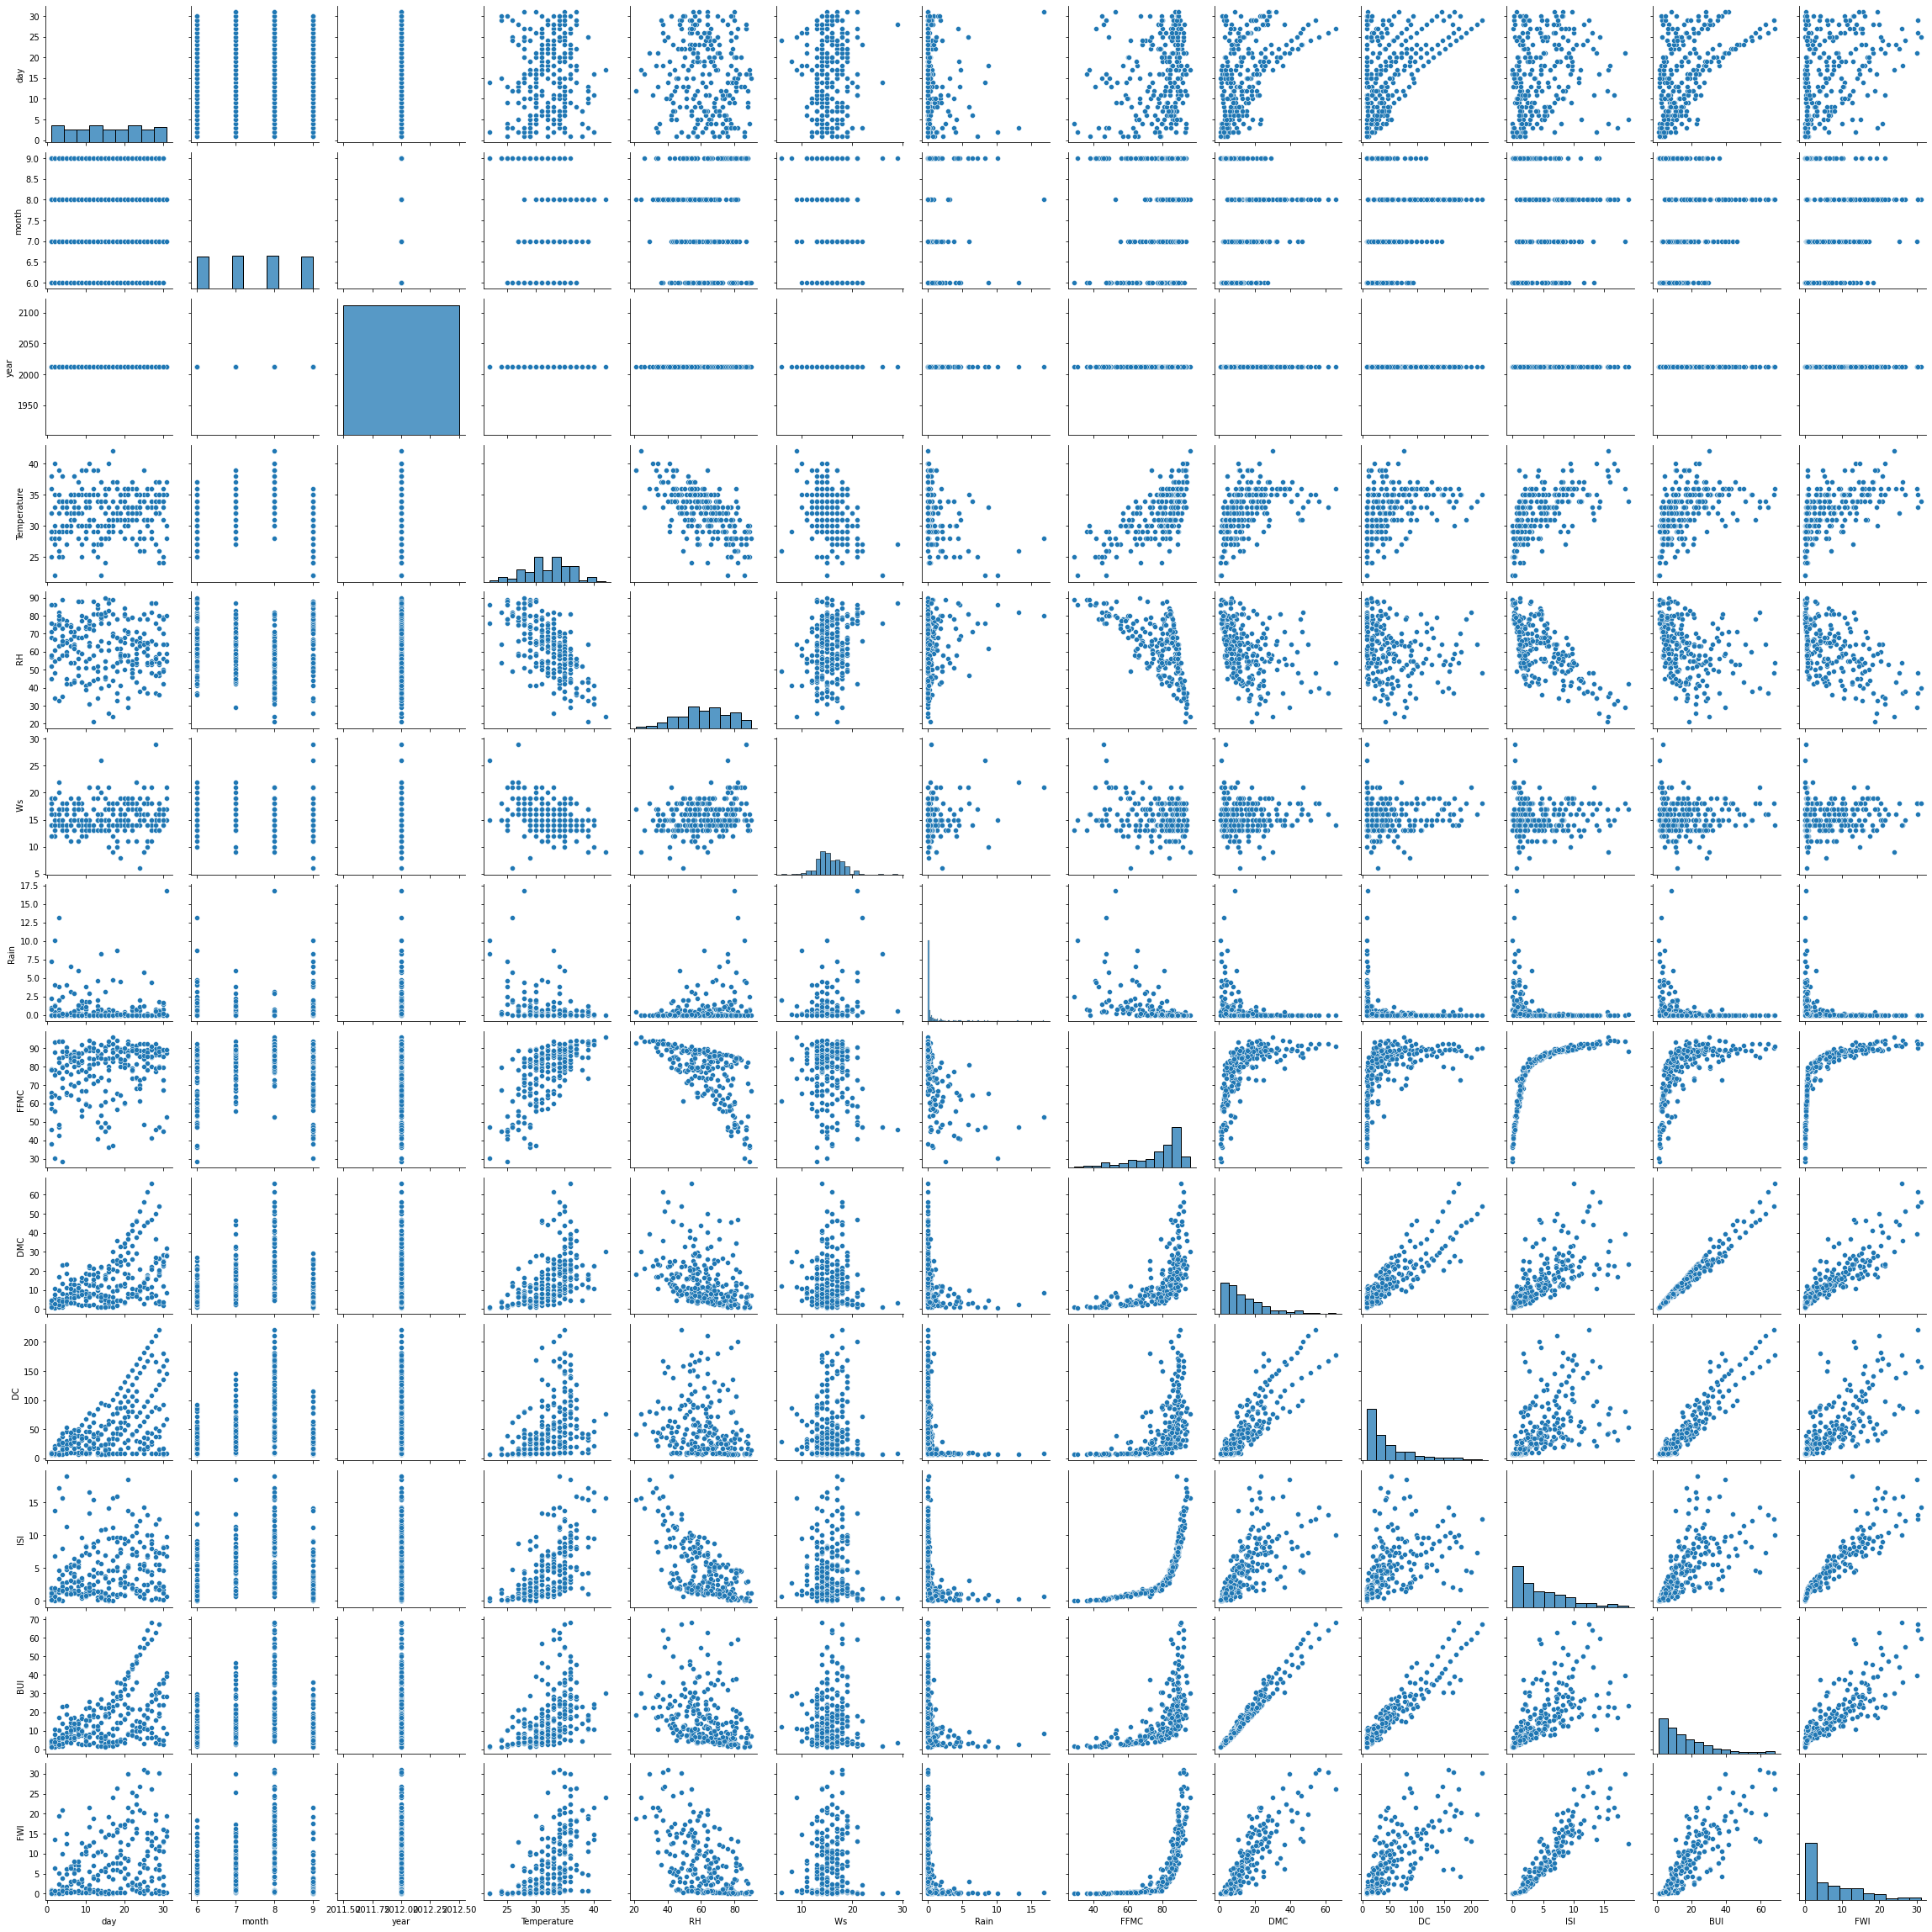

In [27]:
sns.pairplot(df)

<AxesSubplot:>

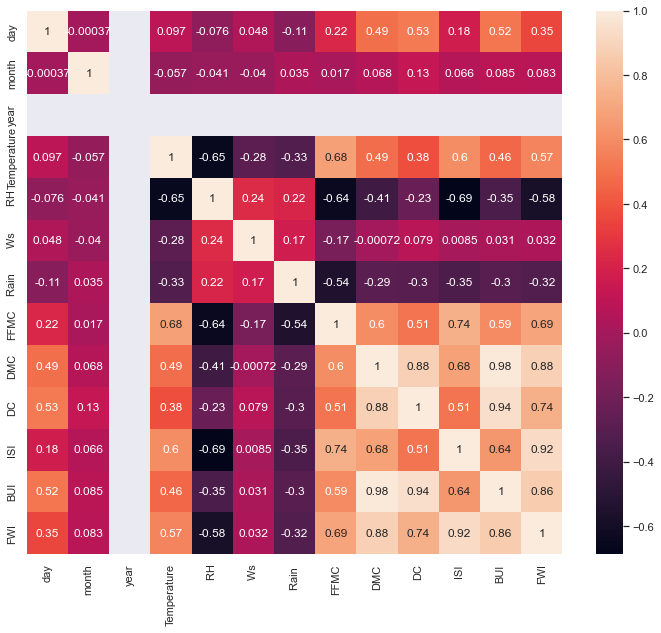

In [28]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.corr(), annot=True)

### Observations:
1. DMC, BUI highly correlated
2. ISI, FWI highly correlated

### Checking correlation with Temperature and above columns

In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

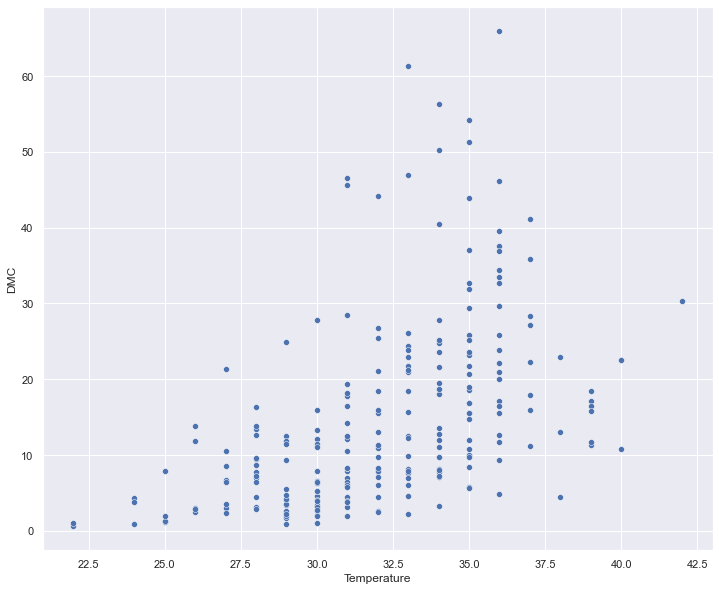

In [30]:
sns.scatterplot(x='Temperature', y='DMC', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

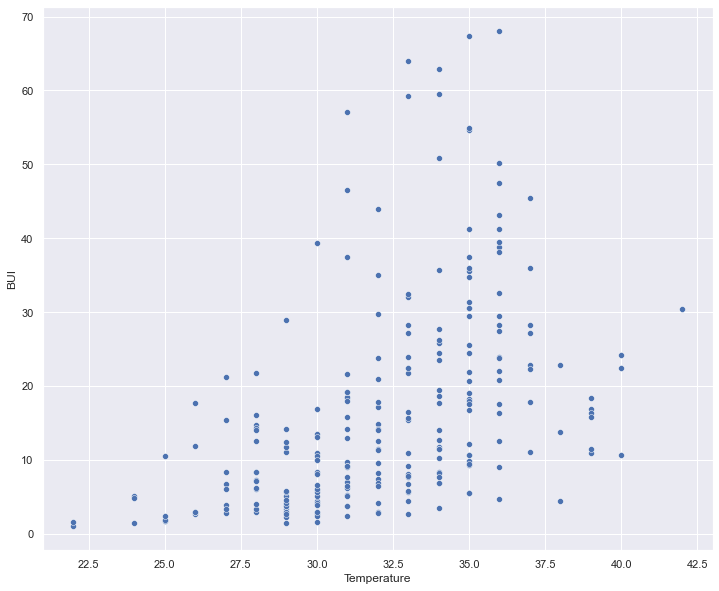

In [31]:
sns.scatterplot(x='Temperature', y='BUI', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

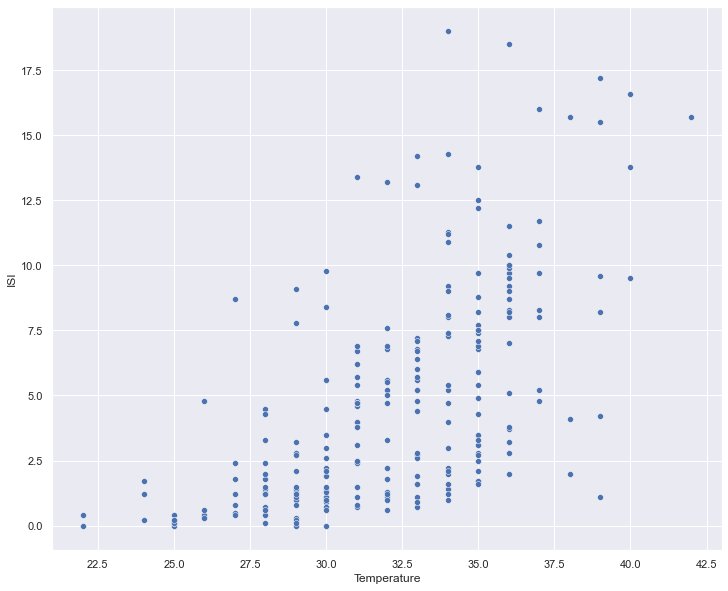

In [37]:
sns.scatterplot(x='Temperature', y='ISI', data=df)

<AxesSubplot:xlabel='Temperature', ylabel='FWI'>

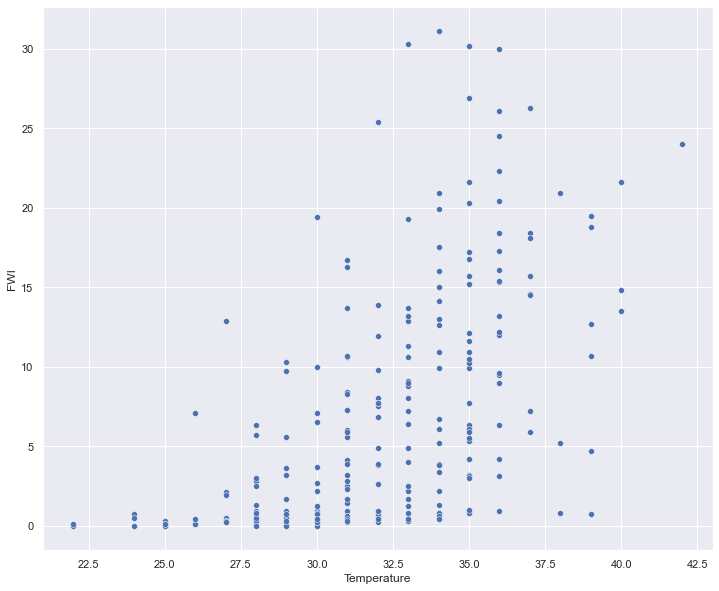

In [35]:
sns.scatterplot(x='Temperature', y='FWI', data=df)

### Observations:
    1. ISI and FWI have almost similar correlation with Temperature column
    2. BUI and DMC have almost similar correlation with Temperature column

<AxesSubplot:xlabel='Temperature', ylabel=' RH'>

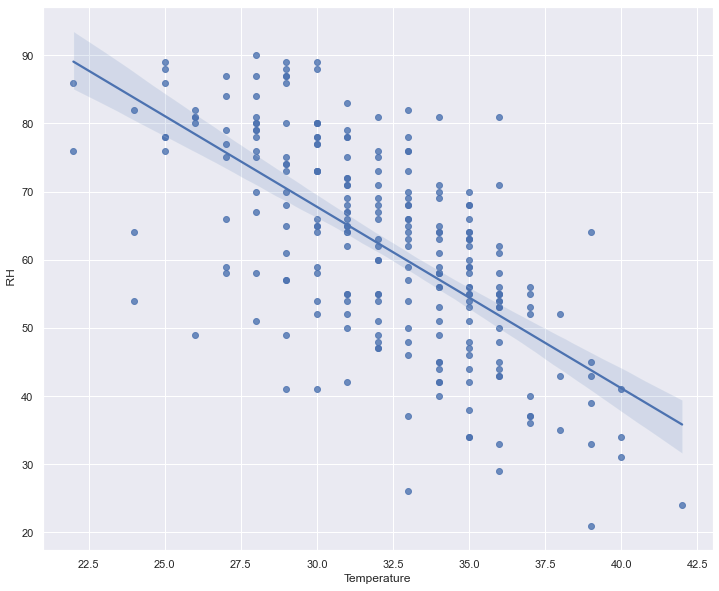

In [36]:
sns.regplot(x='Temperature', y=' RH', data=df)

### Observation:
Temperature is inversely proportional to Relative Humidity 

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

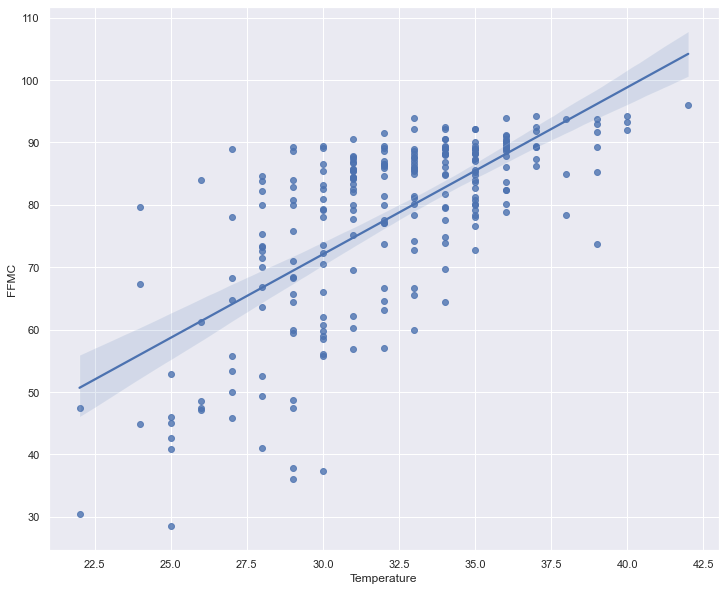

In [40]:
sns.regplot(x='Temperature', y='FFMC', data=df)

### Observation:
Temperature is directly proportional to Fine Fuel Moisture Code (FFMC) index

<AxesSubplot:xlabel='Temperature', ylabel='FWI'>

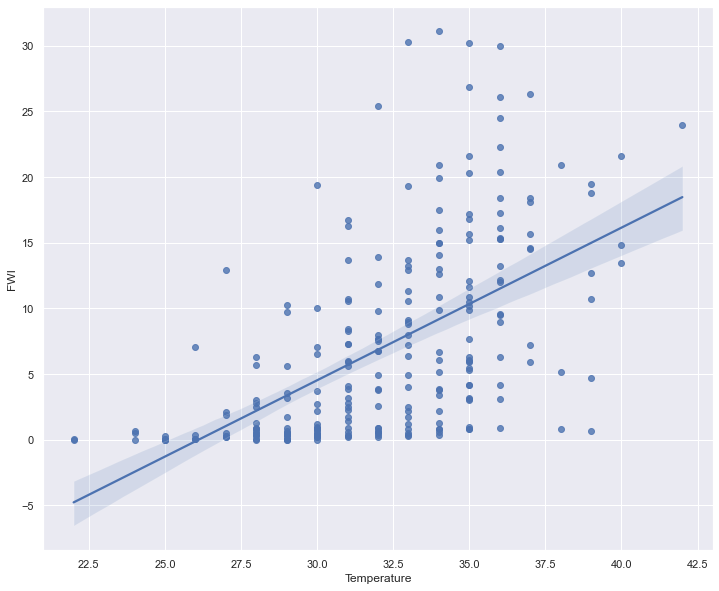

In [41]:
sns.regplot(x='Temperature', y='FWI', data=df)

### Observation:
Temperature is directly proportional to Fire Weather Index (FWI)

### Checking Outliers

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DC'>

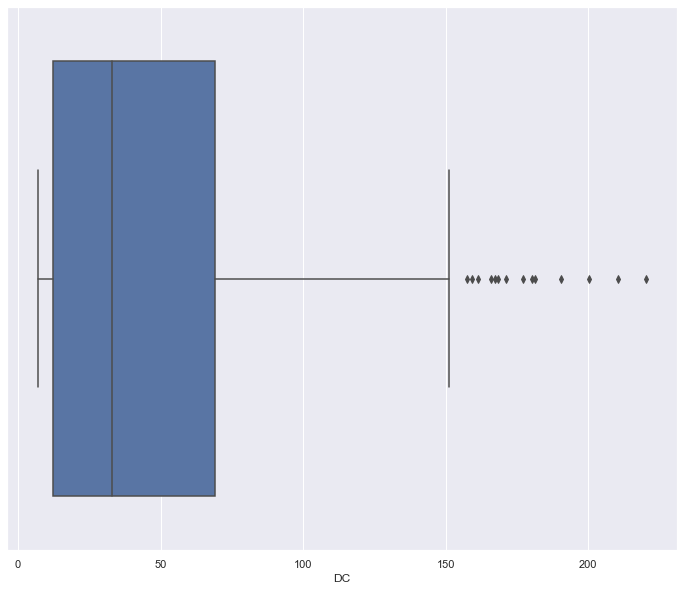

In [45]:
sns.boxplot(df['DC'])

### Handling Categorical Variables

In [71]:
df['Classes  '] = df['Classes  '].str.strip()

In [72]:
df['Classes  '].unique()

array(['not fire', 'fire'], dtype=object)

In [ ]:
replace = []

In [75]:
df['Classes  '] = df['Classes  '].replace(['not fire', 'fire'], [0,1])

In [77]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
83,23,8,2012,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
226,13,9,2012,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1
194,12,8,2012,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,1
66,6,8,2012,32,75,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8,1


### Independent and Dependent Features

In [80]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [81]:
X = df.drop(columns='Temperature')

In [82]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [83]:
y = df['Temperature']

In [84]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

### split data into training and test set

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
29,30,6,2012,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,1
120,29,9,2012,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0
114,23,9,2012,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
5,6,6,2012,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
14,15,6,2012,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
92,1,9,2012,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
180,29,7,2012,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1


In [88]:
X_train.shape

(170, 13)

In [89]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
24,25,6,2012,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1
6,7,6,2012,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
152,1,7,2012,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,0
233,20,9,2012,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8,0
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13,8,2012,34,16,0.2,88.3,16.9,45.1,7.5,17.5,10.5,1
104,13,9,2012,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0.0,0
109,18,9,2012,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7,1
191,9,8,2012,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1


In [90]:
X_test.shape

(73, 13)

In [91]:
y_train

29     33
120    26
114    32
242    24
5      31
       ..
106    24
14     28
92     25
180    34
102    30
Name: Temperature, Length: 170, dtype: int64

In [92]:
y_train.shape

(170,)

In [93]:
y_test

24     31
6      33
152    28
233    34
239    30
       ..
195    35
104    25
109    32
191    39
79     35
Name: Temperature, Length: 73, dtype: int64

In [94]:
y_test.shape

(73,)

### Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_train = scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

In [99]:
X_train

array([[ 1.56765151, -1.30687831,  0.        , ...,  0.75507842,
         0.74777936,  0.90992142],
       [ 1.45605153,  1.39153439,  0.        , ..., -0.94987343,
        -0.91039641, -1.098996  ],
       [ 0.78645164,  1.39153439,  0.        , ..., -0.50510338,
        -0.83266942, -1.098996  ],
       ...,
       [-1.66874796,  1.39153439,  0.        , ..., -1.03074071,
        -0.91039641, -1.098996  ],
       [ 1.45605153, -0.40740741,  0.        , ...,  0.16205169,
         0.48868939,  0.90992142],
       [-0.55274815,  1.39153439,  0.        , ..., -0.99030707,
        -0.88448741, -1.098996  ]])

In [100]:
X_test

array([[ 1.00965160e+00, -1.30687831e+00,  0.00000000e+00,
         8.39147711e-02, -2.09234040e-01, -3.85823876e-01,
         6.47089705e-01, -5.89987708e-02,  2.69064473e-01,
         2.23102774e-01,  8.11844079e-02,  1.64826939e-01,
         9.09921419e-01],
       [-9.99148073e-01, -1.30687831e+00,  0.00000000e+00,
        -5.92175802e-01, -9.74175691e-01, -3.85823876e-01,
         7.52243844e-01, -3.92549439e-01, -4.06550511e-01,
         3.86281817e-01, -4.17497160e-01,  9.37296044e-03,
         9.09921419e-01],
       [-1.66874796e+00, -4.07407407e-01,  0.00000000e+00,
        -3.21739572e-01,  9.38178437e-01,  6.21141440e-01,
        -9.65273758e-01, -9.12267923e-01, -8.52902752e-01,
        -8.25905354e-01, -9.29656608e-01, -8.58578417e-01,
        -1.09899600e+00],
       [ 4.51651691e-01,  1.39153439e+00,  0.00000000e+00,
        -3.21739572e-01, -9.74175691e-01, -2.94281575e-01,
         1.42349838e-01,  2.90065882e-01,  7.60051938e-01,
        -6.16103728e-01,  4.92259754e

### Model Training

In [101]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [102]:
regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

In [103]:
models = [regression, lasso, ridge, elasticnet]

In [105]:
regression.fit(X_train, y_train)

LinearRegression()

### print coefficients and intercept

In [106]:
regression.coef_

array([-5.80896121e-01, -2.69620725e-01,  2.99760217e-15, -9.57968404e-01,
       -7.84242778e-01,  4.24923494e-01,  1.55454106e+00,  3.50343864e+00,
        2.70599802e+00,  4.94774573e-01, -5.04327581e+00, -3.18139966e-01,
       -1.16724927e-01])

In [107]:
regression.intercept_

32.04117647058823

### prediction for test data

In [108]:
y_pred = regression.predict(X_test)

In [109]:
y_pred

array([32.79641075, 35.02274903, 30.63350595, 33.12299224, 31.94283052,
       32.23833383, 31.30709182, 34.64596675, 31.96124513, 30.82888561,
       28.35059241, 39.73626564, 34.37012538, 34.46787268, 34.06057298,
       32.84166182, 32.99177473, 25.89504057, 32.81746314, 34.91043925,
       31.04033313, 28.47749154, 33.24853634, 28.98216672, 36.63268857,
       33.89017314, 33.48485866, 33.53634489, 26.95658767, 33.53120014,
       29.6252971 , 32.30899838, 32.1633019 , 32.96925253, 32.05849405,
       32.9839793 , 31.01781389, 34.31315509, 26.67234481, 20.88467142,
       34.28671884, 32.75694265, 34.19553275, 25.0935279 , 36.4189878 ,
       32.71875823, 30.86736383, 30.67971234, 33.15003874, 28.26380837,
       37.19062884, 35.21819978, 33.66102279, 34.75102604, 33.28117209,
       32.31620419, 32.31942747, 32.54349773, 31.79147197, 36.22333466,
       33.20847127, 30.11380025, 29.12870902, 36.78820367, 31.57165732,
       31.46204735, 33.1511071 , 34.41965372, 35.04570101, 24.47

### Checking Assumptions

### 1. linear relationship between test and predicted values

Text(0, 0.5, 'Test predicted data')

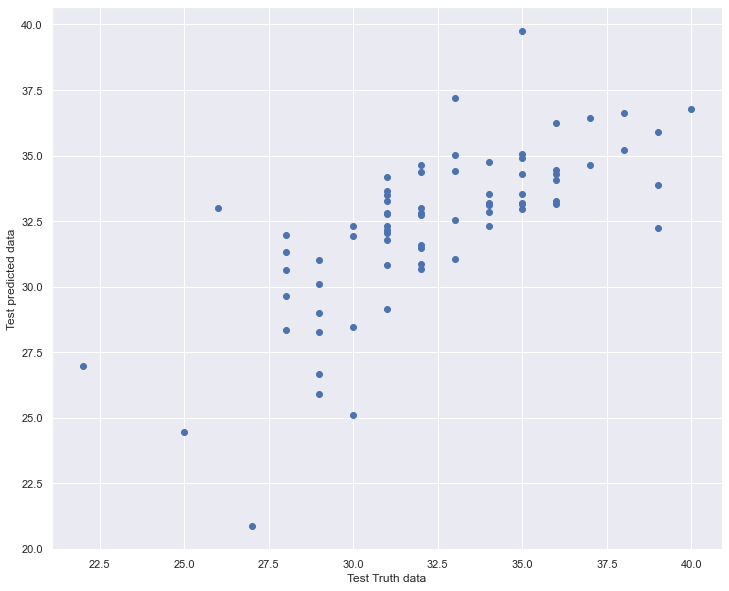

In [111]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth data")
plt.ylabel("Test predicted data")

#### Observation
- test values are directly proportional to predicted values
- model is good fit

### 2. residuals should be normally distributed

In [112]:
residuals = y_test - y_pred

In [113]:
residuals

24    -1.796411
6     -2.022749
152   -2.633506
233    0.877008
239   -1.942831
         ...   
195   -0.045701
104    0.528424
109   -2.641753
191    3.109380
79     1.814511
Name: Temperature, Length: 73, dtype: float64

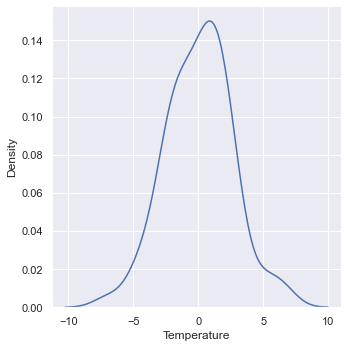

In [114]:
sns.displot(residuals,kind='kde');

### Observation
- residuals are normally distributed
- model is good fit

### 3. Homoscedasticity

<AxesSubplot:ylabel='Temperature'>

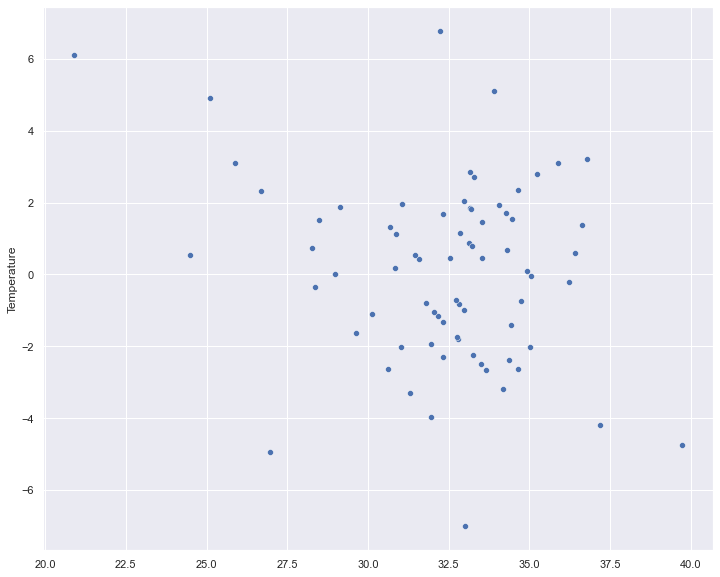

In [115]:
sns.scatterplot(x = y_pred, y=residuals)

### Observation:
- residuals are uniformly spread
- model is good fit

# Performanc Matrix

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
print(f"Mean Squarred Error: {mean_squared_error(y_test, y_pred)}")

Mean Squarred Error: 6.399727193150853


In [121]:
print(f"Root Mean Squarred Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Root Mean Squarred Error: 2.5297682093723237


In [122]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 2.0093401158864626


## R Squarred and Adjusted R Squarred

In [123]:
from sklearn.metrics import r2_score

In [124]:
score = r2_score(y_test, y_pred)

In [125]:
print(f"R Squarred: {score}")

R Squarred: 0.47488457776767024


In [127]:
adj_rsquare = 1 - (1-score)*(len(y_test) - 1) /(len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R Squarred: {adj_rsquare}")

Adjusted R Squarred: 0.35918117964868235


### Checking Performance of Model for Ridge, Lasso and ElasticNet

In [135]:
def evaluation(model, X_train, X_test,y_train, y_test) :
    model.fit(X_train, y_train)
    print(f"Coefficient: \n{model.coef_}")
    print(f"Intercept: {model.intercept_}")
    y_pred = model.predict(X_test)
    print(f"\n{'*'*25} Evaluation for {model} model {'*'*25}\n")
    print(f"Mean Squarred Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Root Mean Squarred Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    
    score = r2_score(y_test, y_pred)
    print(f"\nR Squarred: {score}")
    adj_rsquare = 1 - (1-score)*(len(y_test) - 1) /(len(y_test) - X_test.shape[1] - 1)
    print(f"Adjusted R Squarred: {adj_rsquare}")
    print()

In [136]:
for model in models :
    evaluation(model, X_train, X_test,y_train, y_test)

Coefficient: 
[-5.80896121e-01 -2.69620725e-01  2.99760217e-15 -9.57968404e-01
 -7.84242778e-01  4.24923494e-01  1.55454106e+00  3.50343864e+00
  2.70599802e+00  4.94774573e-01 -5.04327581e+00 -3.18139966e-01
 -1.16724927e-01]
Intercept: 32.04117647058823

************************* Evaluation for LinearRegression() model *************************

Mean Squarred Error: 6.399727193150853
Root Mean Squarred Error: 2.5297682093723237
Mean Absolute Error: 2.0093401158864626

R Squarred: 0.47488457776767024
Adjusted R Squarred: 0.35918117964868235

Coefficient: 
[ 0.         -0.          0.         -0.65210487 -0.         -0.
  1.08755359  0.          0.          0.          0.          0.
  0.        ]
Intercept: 32.04117647058823

************************* Evaluation for Lasso() model *************************

Mean Squarred Error: 6.6495770305009945
Root Mean Squarred Error: 2.5786773800731635
Mean Absolute Error: 2.123185084516282

R Squarred: 0.4543837034530257
Adjusted R Squarred: 0.33

### Feature Selection

In [138]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

### 1. Variance Threshold

In [140]:
from sklearn.feature_selection import VarianceThreshold

In [157]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df)

VarianceThreshold(threshold=0)

In [158]:
variance_threshold.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [159]:
df.columns[variance_threshold.get_support()]

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

#### finding colunns having zero standard deviation

In [147]:
constant_columns = [column for column in df.columns if column not in df.columns[variance_threshold.get_support()]]

In [148]:
print(len(constant_columns))

1


In [149]:
for feature in constant_columns :
    print(feature)

year


In [167]:
df = df.drop(constant_columns,axis=1)

In [168]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


### 2. Correlation

<AxesSubplot:>

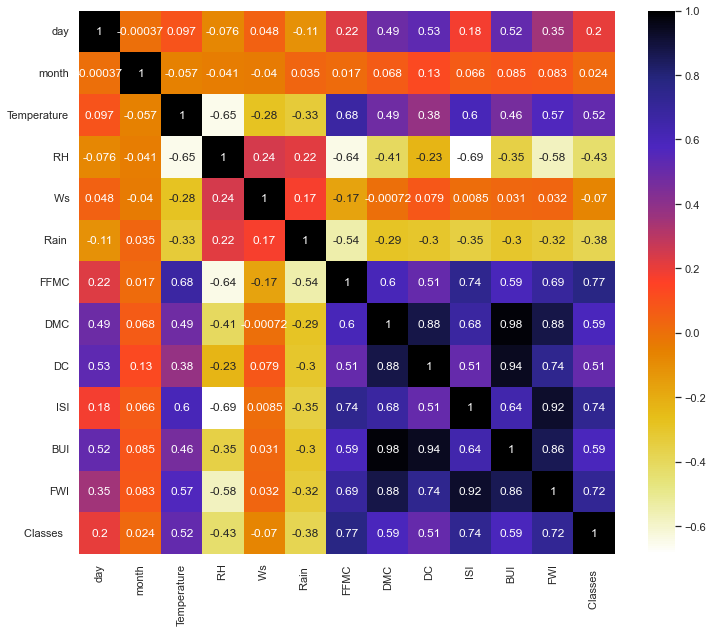

In [169]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [170]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [171]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

3

In [172]:
corr_features

{'BUI', 'DC', 'FWI'}

In [176]:
df = df.drop(corr_features,axis=1)

In [177]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,1.3,0
1,2,6,29,61,13,1.3,64.4,4.1,1.0,0
2,3,6,26,82,22,13.1,47.1,2.5,0.3,0
3,4,6,25,89,13,2.5,28.6,1.3,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,1.2,0
...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,4.5,1
240,27,9,28,87,15,4.4,41.1,6.5,0.1,0
241,28,9,27,87,29,0.5,45.9,3.5,0.4,0
242,29,9,24,54,18,0.1,79.7,4.3,1.7,0


In [179]:
df = df.drop(columns=['day', 'month'], axis=1)

In [180]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
0,29,57,18,0.0,65.7,3.4,1.3,0
1,29,61,13,1.3,64.4,4.1,1.0,0
2,26,82,22,13.1,47.1,2.5,0.3,0
3,25,89,13,2.5,28.6,1.3,0.0,0
4,27,77,16,0.0,64.8,3.0,1.2,0
...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,4.5,1
240,28,87,15,4.4,41.1,6.5,0.1,0
241,27,87,29,0.5,45.9,3.5,0.4,0
242,24,54,18,0.1,79.7,4.3,1.7,0


### repeating same procedure to find model performance

In [181]:
X = df.drop(columns='Temperature')

In [182]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,Classes
0,57,18,0.0,65.7,3.4,1.3,0
1,61,13,1.3,64.4,4.1,1.0,0
2,82,22,13.1,47.1,2.5,0.3,0
3,89,13,2.5,28.6,1.3,0.0,0
4,77,16,0.0,64.8,3.0,1.2,0
...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,4.5,1
240,87,15,4.4,41.1,6.5,0.1,0
241,87,29,0.5,45.9,3.5,0.4,0
242,54,18,0.1,79.7,4.3,1.7,0


In [183]:
y = df['Temperature']

In [184]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int64

### split data into training and test set

In [185]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,Classes
29,50,14,0.0,88.7,22.9,7.2,1
120,80,16,1.8,47.4,2.9,0.3,0
114,54,11,0.5,73.7,7.9,1.2,0
242,54,18,0.1,79.7,4.3,1.7,0
5,67,14,0.0,82.6,5.8,3.1,1
...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,0.2,0
14,80,17,3.1,49.4,3.0,0.4,0
92,76,17,7.2,46.0,1.3,0.2,0
180,59,16,0.0,88.1,19.5,7.4,1


In [187]:
X_train.shape

(170, 7)

In [188]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,Classes
24,64,15,0.0,86.7,14.2,5.7,1
6,54,13,0.0,88.2,9.9,6.4,1
152,58,18,2.2,63.7,3.2,1.2,0
233,58,13,0.2,79.5,18.7,2.1,0
239,65,14,0.0,85.4,16.0,4.5,1
...,...,...,...,...,...,...,...
195,34,16,0.2,88.3,16.9,7.5,1
104,86,21,4.6,40.9,1.3,0.1,0
109,49,11,0.0,89.4,9.8,6.8,1
191,43,12,0.0,91.7,16.5,9.6,1


In [189]:
X_test.shape

(73, 7)

In [190]:
y_train

29     33
120    26
114    32
242    24
5      31
       ..
106    24
14     28
92     25
180    34
102    30
Name: Temperature, Length: 170, dtype: int64

In [191]:
y_train.shape

(170,)

In [192]:
y_test

24     31
6      33
152    28
233    34
239    30
       ..
195    35
104    25
109    32
191    39
79     35
Name: Temperature, Length: 73, dtype: int64

In [193]:
y_test.shape

(73,)

### Feature Scaling

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()

In [196]:
X_train = scaler.fit_transform(X_train)

In [197]:
X_test = scaler.transform(X_test)

In [198]:
X_train

array([[-0.86261203, -0.59170487, -0.38582388, ...,  0.61585956,
         0.57277215,  0.90992142],
       [ 1.16565969,  0.17323679,  0.43805684, ..., -0.9355389 ,
        -1.03570698, -1.098996  ],
       [-0.5921758 , -1.73911734, -0.15696812, ..., -0.54768929,
        -0.82590535, -1.098996  ],
       ...,
       [ 0.89522346,  0.55570761,  2.90969898, ..., -1.05965078,
        -1.05901827, -1.098996  ],
       [-0.25413052,  0.17323679, -0.38582388, ...,  0.35212182,
         0.61939473,  0.90992142],
       [ 0.96283252,  2.08559091,  0.43805684, ..., -1.01310882,
        -0.84921665, -1.098996  ]])

In [199]:
X_test

array([[ 8.39147711e-02, -2.09234040e-01, -3.85823876e-01,
         6.47089705e-01, -5.89987708e-02,  2.23102774e-01,
         9.09921419e-01],
       [-5.92175802e-01, -9.74175691e-01, -3.85823876e-01,
         7.52243844e-01, -3.92549439e-01,  3.86281817e-01,
         9.09921419e-01],
       [-3.21739572e-01,  9.38178437e-01,  6.21141440e-01,
        -9.65273758e-01, -9.12267923e-01, -8.25905354e-01,
        -1.09899600e+00],
       [-3.21739572e-01, -9.74175691e-01, -2.94281575e-01,
         1.42349838e-01,  2.90065882e-01, -6.16103728e-01,
        -1.09899600e+00],
       [ 1.51523828e-01, -5.91704866e-01, -3.85823876e-01,
         5.55956118e-01,  8.06270905e-02, -5.66327264e-02,
         9.09921419e-01],
       [ 8.39147711e-02, -2.50405899e+00,  1.63429932e-01,
        -2.57235889e-01, -2.52923578e-01, -8.49216645e-01,
        -1.09899600e+00],
       [ 8.27614401e-01,  1.73236786e-01, -3.85823876e-01,
         3.31627288e-01, -8.19184016e-01, -3.36368227e-01,
         9.0992141

### Model Training

In [200]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [201]:
regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

In [202]:
models = [regression, lasso, ridge, elasticnet]

In [203]:
for model in models :
    evaluation(model, X_train, X_test,y_train, y_test)

Coefficient: 
[-0.97461209 -0.70606933  0.27319877  1.49875629  0.41184397  0.25424264
 -0.04980191]
Intercept: 32.04117647058823

************************* Evaluation for LinearRegression() model *************************

Mean Squarred Error: 5.797697952291617
Root Mean Squarred Error: 2.4078409316837392
Mean Absolute Error: 1.9585500081961253

R Squarred: 0.5242827520130258
Adjusted R Squarred: 0.4730516637682747

Coefficient: 
[-0.65210487 -0.         -0.          1.08755359  0.          0.
  0.        ]
Intercept: 32.04117647058823

************************* Evaluation for Lasso() model *************************

Mean Squarred Error: 6.6495770305009945
Root Mean Squarred Error: 2.5786773800731635
Mean Absolute Error: 2.123185084516282

R Squarred: 0.4543837034530257
Adjusted R Squarred: 0.39562502536335153

Coefficient: 
[-0.97660576 -0.70317843  0.26191679  1.46623435  0.41139452  0.25938376
 -0.03254973]
Intercept: 32.04117647058823

************************* Evaluation for Ridg